In [32]:
# Muebles

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib.request
import requests
import time 
from multiprocessing import Process, Queue, Pool
import threading
import sys
import numpy as np
import re
#from random_user_agent.user_agent import UserAgent
#from random_user_agent.params import SoftwareName, OperatingSystem
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
#from fake_useragent import UserAgent
from selenium.webdriver.chrome.options import Options
#import pandasql as ps
from IPython.display import display,HTML
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps

In [2]:
def scrapper_lomas(marca):
    path = r"C:\Users\juanp\OneDrive\Escritorio\ManejoDatos\chromedriver.exe" # carga del web driver (asignar ruta donde se encuentra el driver)
    driver = webdriver.Chrome(path)
    
    driver.get('https://www.casadelaslomas.com/'+marca+'.html')
    
    time.sleep(12) # dormir equipo para carga de pagina
    
    productos = driver.find_elements_by_class_name('item')
    
    time.sleep(12)
    
    fecha = time.strftime("%d/%m/%Y")
    # Asignación Fecha
    lista_fecha=[]
    
    # Asignación autoservicio
    lista_autoservicio=[]
    
    # Asignación de categoria del producto
    lista_categoria=[]
    
    # Asignacion de nombres
    lista_nombres_lomas=[]
    
    # Asignacion de precios normales
    lista_preciosnormales_lomas=[]
    
    # Asignacion de precios descuento
    lista_preciosespeciales_lomas=[]
    
    for i in range(0,len(productos)):
        lista_autoservicio.append('CASA DE LAS LOMAS')
        lista_fecha.append(fecha)

        if marca == 'comedores':
            lista_categoria.append('COMEDORES')
        elif marca == 'salas':
            lista_categoria.append('SALAS')
        elif marca == 'recamaras':
            lista_categoria.append('RECÁMARAS')
        try:
            lista_nombres_lomas.append(productos[i].find_elements_by_class_name("product-name")[0].text)
            lista_preciosnormales_lomas.append(productos[i].find_elements_by_class_name("old-price")[0].text)
            lista_preciosespeciales_lomas.append(productos[i].find_elements_by_class_name("special-price")[0].text)
        except:
            lista_nombres_lomas.append(np.nan)
            lista_preciosnormales_lomas.append(np.nan)
            lista_preciosespaciales_lomas.append(np.nan)
            
    time.sleep(12)

    # creacion de data frame
    df_lomas =pd.DataFrame(columns=["FECHA","AUTOSERVICIO","PRODUCTO","NOMBRE","PRECIO_NORMAL","PRECIO_PROMOCION"])
    df_lomas["FECHA"] = lista_fecha
    df_lomas["AUTOSERVICIO"] = lista_autoservicio
    df_lomas["PRODUCTO"] = lista_categoria
    df_lomas["NOMBRE"] = lista_nombres_lomas
    df_lomas["PRECIO_NORMAL"] = lista_preciosnormales_lomas
    df_lomas["PRECIO_PROMOCION"] =lista_preciosespeciales_lomas

    df_lomas

    driver.quit() ## se borra instancia de web driver
    
    #limpiamos las columnas 
    #aqui separamos el texto y el precio en dos  
    df_lomas[['textadicional','PRECIO_NORMAL']] = df_lomas.PRECIO_NORMAL.str.split("$",expand=True)
    df_lomas[['textadicional2','PRECIO_PROMOCION']] = df_lomas.PRECIO_PROMOCION.str.split("$",expand=True)

    #eliminamos el texto que venia acompaniado del precio 
    del df_lomas['textadicional']
    del df_lomas['textadicional2']

    df_lomas.NOMBRE=df_lomas.NOMBRE.str.upper() # se convierten nombres a mayusculas
    #ahora quitamos las "," de los precios 
    #quitamos las comas de los precios 
    df_lomas.PRECIO_NORMAL =df_lomas.PRECIO_NORMAL.str.replace(",","")
    df_lomas.PRECIO_NORMAL = df_lomas.PRECIO_NORMAL.astype(float)
    df_lomas.PRECIO_PROMOCION =df_lomas.PRECIO_PROMOCION.str.replace(",","")
    df_lomas.PRECIO_PROMOCION = df_lomas.PRECIO_PROMOCION.astype(float)    

    return df_lomas

In [3]:
# Muebles Troncoso

In [4]:
def scrapper_troncoso(marca):
    path = r"C:\Users\juanp\OneDrive\Escritorio\ManejoDatos\chromedriver.exe" # carga del web driver (asignar ruta donde se encuentra el driver)
    driver = webdriver.Chrome(path)
    
    driver.get('https://www.mueblestroncoso.com.mx/collections/'+marca)
    
    time.sleep(12) # dormir equipo para carga de pagina
    
    productos = driver.find_elements_by_class_name('item')
    
    time.sleep(12)
    
    fecha = time.strftime("%d/%m/%Y")
    # Asignación Fecha
    lista_fecha=[]
    
    # Asignación autoservicio
    lista_autoservicio=[]
    
    # Asignación de categoria del producto
    lista_categoria=[]
    
    # Asignacion de nombres
    lista_nombres_troncoso=[]
    
    # Asignacion de precios normales
    lista_preciosnormales_troncoso=[]
     
    # Asignacion de precios final descuento 
    lista_preciosespeciales_troncoso=[]
    
    for i in range(0,len(productos)):
        lista_autoservicio.append('MUEBLES TRONCOSO')
        lista_fecha.append(fecha)

        if marca == 'comedores':
            lista_categoria.append('COMEDORES')
        elif marca == 'salas':
            lista_categoria.append('SALAS')
        elif marca == 'recamaras':
            lista_categoria.append('RECÁMARAS')
            
        try:
            lista_nombres_troncoso.append(productos[i].find_elements_by_class_name("title")[0].text)
            lista_preciosnormales_troncoso.append(productos[i].find_elements_by_class_name("compare_price")[0].text)
            lista_preciosespeciales_troncoso.append(productos[i].find_elements_by_class_name("price")[0].text)
        except:
            lista_nombres_troncoso.append(np.nan)
            lista_preciosnormales_troncoso.append(np.nan)
            lista_preciosespaciales_troncoso.append(np.nan)  
              
    time.sleep(12)
    
    # creacion de data frame
    df_troncoso =pd.DataFrame(columns=["FECHA","AUTOSERVICIO","PRODUCTO","NOMBRE","PRECIO_NORMAL","PRECIO_PROMOCION"])
    df_troncoso["FECHA"] = lista_fecha
    df_troncoso["AUTOSERVICIO"] = lista_autoservicio
    df_troncoso["PRODUCTO"] = lista_categoria
    df_troncoso["NOMBRE"] = lista_nombres_troncoso
    df_troncoso["PRECIO_NORMAL"] = lista_preciosnormales_troncoso
    df_troncoso["PRECIO_PROMOCION"] =lista_preciosespeciales_troncoso
    
    driver.quit()
    
    #limpiamos las columnas 
    
    #aqui separamos el texto y el precio en dos  
    df_troncoso[['textadicional','PRECIO_NORMAL']] = df_troncoso.PRECIO_NORMAL.str.split("$",expand=True)
    df_troncoso[['textadicional2','PRECIO_PROMOCION']] = df_troncoso.PRECIO_PROMOCION.str.split("$",expand=True)
    
    #eliminamos el texto que venia acompaniado del precio 
    del df_troncoso['textadicional']
    del df_troncoso['textadicional2']
    
    df_troncoso.NOMBRE=df_troncoso.NOMBRE.str.upper() # se convierten nombres a mayusculas
    #Quitamos las "," de los precios 
    #quitamos las comas de los precios 
    df_troncoso.PRECIO_NORMAL =df_troncoso.PRECIO_NORMAL.str.replace(",","")
    df_troncoso.PRECIO_NORMAL = df_troncoso.PRECIO_NORMAL.astype(float)
    df_troncoso.PRECIO_PROMOCION =df_troncoso.PRECIO_PROMOCION.str.replace(",","")
    df_troncoso.PRECIO_PROMOCION = df_troncoso.PRECIO_PROMOCION.astype(float)    
    

    return df_troncoso    

In [5]:
# Muebles Pergo

In [6]:
def scrapper_pergo(marca):
    path = r"C:\Users\juanp\OneDrive\Escritorio\ManejoDatos\chromedriver.exe" # carga del web driver (asignar ruta donde se encuentra el driver)
    driver = webdriver.Chrome(path)
    
    driver.get('https://www.mueblespergo.com/collections/'+marca)
    
    time.sleep(12) # dormir equipo para carga de pagina
    
    productos = driver.find_elements_by_class_name('sf__col-item')
    
    time.sleep(12)
    
    
    fecha = time.strftime("%d/%m/%Y")
    # Asignación Fecha
    lista_fecha=[]
    
    # Asignación autoservicio
    lista_autoservicio=[]
    
    # Asignación de categoria del producto
    lista_categoria=[]
    
    # Asignacion de nombres
    lista_nombres_pergo=[]
    
    # Asignacion de precios normales
    lista_preciosnormales_pergo=[]
    
    # Asignacion de precios descuento
    lista_preciosespeciales_pergo=[]
    
    
    
    for i in range(0,len(productos)):
        lista_autoservicio.append('MUEBLES PERGO')
        lista_fecha.append(fecha)
     
        if marca == 'comedores':
            lista_categoria.append('COMEDORES')
        elif marca == 'salas':
            lista_categoria.append('SALAS')
        elif marca == 'recamaras':
            lista_categoria.append('RECÁMARAS')
            
        try:
            lista_nombres_pergo.append(productos[i].find_elements_by_class_name("max-w-full")[0].text)
            lista_preciosnormales_pergo.append(productos[i].find_elements_by_class_name("prod__compare_price")[0].text)
            lista_preciosespeciales_pergo.append(productos[i].find_elements_by_class_name("prod__price")[0].text)
        except:
            lista_nombres_pergo.append(np.nan)
            lista_preciosnormales_pergo.append(np.nan)
            lista_preciosespaciales_pergo.append(np.nan)
            
        
            
            

    # creacion de data frame
    df_pergo =pd.DataFrame(columns=["FECHA","AUTOSERVICIO","PRODUCTO","NOMBRE","PRECIO_NORMAL","PRECIO_PROMOCION"])
    df_pergo["FECHA"] = lista_fecha
    df_pergo["AUTOSERVICIO"] = lista_autoservicio
    df_pergo["PRODUCTO"] = lista_categoria
    df_pergo["NOMBRE"] = lista_nombres_pergo
    df_pergo["PRECIO_NORMAL"] = lista_preciosnormales_pergo
    df_pergo["PRECIO_PROMOCION"] =lista_preciosespeciales_pergo

    df_pergo

    driver.quit() ## se borra instancia de web driver
    
    #limpiamos las columnas 
    #aqui separamos el texto y el precio en dos  
    df_pergo[['textadicional','PRECIO_NORMAL']] = df_pergo.PRECIO_NORMAL.str.split("$",expand=True)
    df_pergo[['textadicional2','PRECIO_PROMOCION']] = df_pergo.PRECIO_PROMOCION.str.split("$",expand=True)
    
    #eliminamos el texto que venia acompaniado del precio 
    del df_pergo['textadicional']
    del df_pergo['textadicional2']
    
    df_pergo.NOMBRE=df_pergo.NOMBRE.str.upper() # se convierten nombres a mayusculas
    #Quitamos las "," de los precios 
    #quitamos las comas de los precios 
    df_pergo.PRECIO_NORMAL =df_pergo.PRECIO_NORMAL.str.replace(",","")
    df_pergo.PRECIO_NORMAL = df_pergo.PRECIO_NORMAL.astype(float)
    df_pergo.PRECIO_PROMOCION =df_pergo.PRECIO_PROMOCION.str.replace(",","")
    df_pergo.PRECIO_PROMOCION = df_pergo.PRECIO_PROMOCION.astype(float) 
    

    return df_pergo

In [7]:
# Salas 
salas_lomas = scrapper_lomas('salas')
salas_troncoso = scrapper_troncoso('salas')
salas_pergo = scrapper_pergo('salas')

# Comedores
comedores_lomas= scrapper_lomas('comedores')
comedores_troncoso = scrapper_troncoso('comedores')
comedores_pergo= scrapper_pergo('comedores')

# Recamaras
recamaras_lomas = scrapper_lomas('recamaras')
recamaras_troncoso = scrapper_troncoso('recamaras')
recamaras_pergo = scrapper_pergo('recamaras')

In [8]:
df_mueblerias = pd.concat([salas_lomas,salas_troncoso,salas_pergo,comedores_lomas,comedores_troncoso,comedores_pergo,recamaras_lomas,recamaras_troncoso,recamaras_pergo ],ignore_index=True)

In [9]:
df_mueblerias

,FECHA,AUTOSERVICIO,PRODUCTO,NOMBRE,PRECIO_NORMAL,PRECIO_PROMOCION
0,16/12/2022,CASA DE LAS LOMAS,SALAS,SALA MODULAR DERECHA QUINCY GRAPHITE,28248.75,22599.0
1,16/12/2022,CASA DE LAS LOMAS,SALAS,SALA MODULAR IZQUIERDA EBONY KLEIN SMOKE,31248.75,24999.0
2,16/12/2022,CASA DE LAS LOMAS,SALAS,SALA MODULAR IZQUIERDA DARIA VL STONE GREY,33747.50,26998.0
3,16/12/2022,CASA DE LAS LOMAS,SALAS,SOFÁ BEIGE 1019,25873.75,20699.0
4,16/12/2022,CASA DE LAS LOMAS,SALAS,LOVE SEAT BEIGE 1019,19373.75,15499.0
...,...,...,...,...,...,...
427,16/12/2022,MUEBLES PERGO,RECÁMARAS,SET CAMA Y 2 BUROS TERUEL,104000.00,72990.0
428,16/12/2022,MUEBLES PERGO,RECÁMARAS,SET CAMA + BURÓS DINAMARCA,186000.00,79990.0
429,16/12/2022,MUEBLES PERGO,RECÁMARAS,SET CAMA Y 2 BUROS MCCOBB,104000.00,72990.0
430,16/12/2022,MUEBLES PERGO,RECÁMARAS,SET CAMA MÁS DOS BUROS MILAN SLATTE,126500.00,62990.0


In [10]:
df_mueblerias.to_excel("scraper_mueblerias.xlsx",index=False)

In [12]:
df_mueblerias = pd.read_excel(r"C:\Users\juanp\scraper_mueblerias.xlsx")

In [13]:
df_mueblerias

,FECHA,AUTOSERVICIO,PRODUCTO,NOMBRE,PRECIO_NORMAL,PRECIO_PROMOCION
0,16/12/2022,CASA DE LAS LOMAS,SALAS,SALA MODULAR DERECHA QUINCY GRAPHITE,28248.75,22599.0
1,16/12/2022,CASA DE LAS LOMAS,SALAS,SALA MODULAR IZQUIERDA EBONY KLEIN SMOKE,31248.75,24999.0
2,16/12/2022,CASA DE LAS LOMAS,SALAS,SALA MODULAR IZQUIERDA DARIA VL STONE GREY,33747.50,26998.0
3,16/12/2022,CASA DE LAS LOMAS,SALAS,SOFÁ BEIGE 1019,25873.75,20699.0
4,16/12/2022,CASA DE LAS LOMAS,SALAS,LOVE SEAT BEIGE 1019,19373.75,15499.0
...,...,...,...,...,...,...
427,16/12/2022,MUEBLES PERGO,RECÁMARAS,SET CAMA Y 2 BUROS TERUEL,104000.00,72990.0
428,16/12/2022,MUEBLES PERGO,RECÁMARAS,SET CAMA + BURÓS DINAMARCA,186000.00,79990.0
429,16/12/2022,MUEBLES PERGO,RECÁMARAS,SET CAMA Y 2 BUROS MCCOBB,104000.00,72990.0
430,16/12/2022,MUEBLES PERGO,RECÁMARAS,SET CAMA MÁS DOS BUROS MILAN SLATTE,126500.00,62990.0


In [165]:
#CONSULTAS 

In [167]:
#CONSULTA 1 
#obtenemos los productos mas elevados en precio de todo nuestro data frame, para asi ver quien maneja los productos mas caros 
ps.sqldf("SELECT AUTOSERVICIO,PRODUCTO,NOMBRE,MAX(PRECIO_PROMOCION) FROM df_mueblerias GROUP BY PRODUCTO ORDER BY PRECIO_PROMOCION;")

,AUTOSERVICIO,PRODUCTO,NOMBRE,MAX(PRECIO_PROMOCION)
0,MUEBLES PERGO,RECÁMARAS,SET CAMA + BURÓS ORLEANS,167990.0
1,MUEBLES PERGO,COMEDORES,SET MESA VIDRIO + 8 SILLAS COPENHAGUE,185990.0
2,MUEBLES PERGO,SALAS,ESCUADRA SENNA,299990.0


In [218]:
#CONSULTA 2
#Obtenemos los productos mas baratos de las 3 mueblerias juntas, asi podemos ver por ejemplo, que troncoso maneja los precios mas bajos 
#pues de entre las mueblerias los 3 productos mas baratos corresponden a troncoso
ps.sqldf("SELECT AUTOSERVICIO,PRODUCTO,NOMBRE,MIN(PRECIO_PROMOCION) FROM df_mueblerias GROUP BY PRODUCTO ORDER BY PRECIO_PROMOCION;")

,AUTOSERVICIO,PRODUCTO,NOMBRE,MIN(PRECIO_PROMOCION)
0,MUEBLES TRONCOSO,RECÁMARAS,CABECERA BURDEOS TABACO,1990.0
1,MUEBLES TRONCOSO,COMEDORES,ANTECOMEDOR DT-886 WHITE - SILLA 921,3490.0
2,MUEBLES TRONCOSO,SALAS,SALA BOLIVIA CHOCOLATE 2-2,6990.0


In [244]:
#CONSULTA 3 
#Obtenemos el producto mas caro de cada autoservicio 
ps.sqldf("SELECT AUTOSERVICIO,PRODUCTO,NOMBRE,MAX(PRECIO_PROMOCION) FROM df_mueblerias GROUP BY AUTOSERVICIO ORDER BY PRECIO_PROMOCION desc;")

,AUTOSERVICIO,PRODUCTO,NOMBRE,MAX(PRECIO_PROMOCION)
0,MUEBLES PERGO,SALAS,ESCUADRA SENNA,299990.0
1,CASA DE LAS LOMAS,COMEDORES,COMEDOR CARMEN CON 6 SILLAS LISAS Y 4 CAPITONADAS,137989.0
2,MUEBLES TRONCOSO,COMEDORES,COMEDOR ESTOCOLMO - SILLONES,117990.0


In [234]:
#CONSULTA 4 
#Obtenemos el precio promedio que gastariamos si quisieramos comprar algun producto de 'CASA DE LAS LOMAS'
ps.sqldf("SELECT AUTOSERVICIO,PRODUCTO,AVG(PRECIO_PROMOCION) FROM df_mueblerias WHERE (PRODUCTO ='SALAS' or PRODUCTO = 'COMEDORES' or PRODUCTO = 'RECÁMARAS' ) GROUP BY PRODUCTO ORDER BY PRECIO_PROMOCION desc")

,AUTOSERVICIO,PRODUCTO,AVG(PRECIO_PROMOCION)
0,CASA DE LAS LOMAS,COMEDORES,38473.184270
1,CASA DE LAS LOMAS,SALAS,35792.468493
2,CASA DE LAS LOMAS,RECÁMARAS,24538.475000


In [185]:
#CONSULTA 5
# si tenemos un presupuesto de entre 1,000 y 10,000
ps.sqldf("SELECT AUTOSERVICIO,PRODUCTO, PRECIO_PROMOCION FROM df_mueblerias WHERE PRECIO_PROMOCION BETWEEN 1000 AND 10000")

,AUTOSERVICIO,PRODUCTO,PRECIO_PROMOCION
0,MUEBLES TRONCOSO,SALAS,6990.0
1,MUEBLES TRONCOSO,SALAS,7390.0
2,MUEBLES TRONCOSO,SALAS,9790.0
3,MUEBLES TRONCOSO,SALAS,6990.0
4,MUEBLES TRONCOSO,SALAS,9990.0
...,...,...,...
66,MUEBLES TRONCOSO,RECÁMARAS,8790.0
67,MUEBLES TRONCOSO,RECÁMARAS,7790.0
68,MUEBLES TRONCOSO,RECÁMARAS,9390.0
69,MUEBLES TRONCOSO,RECÁMARAS,7490.0


In [262]:
#CONSULTA 6 
#Si tenemos un presupuesto de entre 10,000 y 20,000 y queremos comprar nuetsros muebles en muebles troncoso o casa de las lomas 
ps.sqldf("SELECT * FROM df_mueblerias WHERE PRECIO_PROMOCION BETWEEN 10000 AND 20000 and (AUTOSERVICIO = 'MUEBLES TRONCOSO' or AUTOSERVICIO= 'CASA DE LAS LOMAS' ) ORDER BY PRECIO_PROMOCION desc")

,FECHA,AUTOSERVICIO,PRODUCTO,NOMBRE,PRECIO_NORMAL,PRECIO_PROMOCION
0,13/12/2022,MUEBLES TRONCOSO,COMEDORES,ANTECOMEDOR DT-375 - SILLAS DC-954 NEGRAS,44423.00,19990.0
1,13/12/2022,MUEBLES TRONCOSO,COMEDORES,ANTECOMEDOR MONACO NOGAL JR - SILLAS DORIAN Y ...,44423.00,19990.0
2,13/12/2022,MUEBLES TRONCOSO,COMEDORES,ANTECOMEDOR TAMPA JR - SILLAS BRISTOL CRUDO,44423.00,19990.0
3,13/12/2022,CASA DE LAS LOMAS,RECÁMARAS,RECAMARA MATRIMONIAL JOYCE RINO NEGRO,24873.75,19899.0
4,13/12/2022,MUEBLES TRONCOSO,COMEDORES,ANTECOMEDOR TAMAYO 1.50 - SILLAS EGIPTO TABACO,43978.00,19790.0
...,...,...,...,...,...,...
117,13/12/2022,MUEBLES TRONCOSO,SALAS,SALA MURANO LETTEO CAPUCHINO 2-2,23978.00,10790.0
118,13/12/2022,MUEBLES TRONCOSO,SALAS,SALA JULLIETTE METAL AMBAR 3-2,23089.00,10390.0
119,13/12/2022,MUEBLES TRONCOSO,COMEDORES,ANTECOMEDOR APOLO - SILLAS ALTAS APOLO CHOCO.,23089.00,10390.0
120,13/12/2022,MUEBLES TRONCOSO,SALAS,SALA TABASCO MODULAR LOUIS GRIS OBSCURO,22645.00,10190.0


In [14]:
#CONSULTA 7 
# Si queremos conocer cuantos muebles nos ofrece cada autoservicio 
tabla1 = ps.sqldf("SELECT COUNT(*), AUTOSERVICIO FROM df_mueblerias WHERE AUTOSERVICIO = 'MUEBLES TRONCOSO'")
tabla2 = ps.sqldf("SELECT COUNT(*), AUTOSERVICIO FROM df_mueblerias WHERE AUTOSERVICIO = 'MUEBLES PERGO'")
tabla3 = ps.sqldf("SELECT COUNT(*), AUTOSERVICIO FROM df_mueblerias WHERE AUTOSERVICIO = 'CASA DE LAS LOMAS'")
pd.concat([tabla1,tabla2,tabla3], ignore_index=True)

,COUNT(*),AUTOSERVICIO
0,246,MUEBLES TRONCOSO
1,36,MUEBLES PERGO
2,150,CASA DE LAS LOMAS


In [23]:
#CONSULTA 8
#Si queremos conocer la cantidad de cada mueble que tiene cada autoservicio
tabla1 = ps.sqldf("SELECT COUNT(*), AUTOSERVICIO, PRODUCTO FROM df_mueblerias WHERE PRODUCTO = 'SALAS' AND AUTOSERVICIO='CASA DE LAS LOMAS'")
tabla2 = ps.sqldf("SELECT COUNT(*), AUTOSERVICIO, PRODUCTO FROM df_mueblerias WHERE PRODUCTO = 'COMEDORES' AND AUTOSERVICIO='CASA DE LAS LOMAS'")
tabla3 = ps.sqldf("SELECT COUNT(*), AUTOSERVICIO, PRODUCTO FROM df_mueblerias WHERE PRODUCTO = 'RECÁMARAS' AND AUTOSERVICIO='CASA DE LAS LOMAS'")
tabla4 = ps.sqldf("SELECT COUNT(*), AUTOSERVICIO, PRODUCTO FROM df_mueblerias WHERE PRODUCTO = 'SALAS' AND AUTOSERVICIO='MUEBLES TRONCOSO'")
tabla5 = ps.sqldf("SELECT COUNT(*), AUTOSERVICIO, PRODUCTO FROM df_mueblerias WHERE PRODUCTO = 'COMEDORES' AND AUTOSERVICIO='MUEBLES TRONCOSO'")
tabla6 = ps.sqldf("SELECT COUNT(*), AUTOSERVICIO, PRODUCTO FROM df_mueblerias WHERE PRODUCTO = 'RECÁMARAS' AND AUTOSERVICIO='MUEBLES TRONCOSO'")
tabla7 = ps.sqldf("SELECT COUNT(*), AUTOSERVICIO, PRODUCTO FROM df_mueblerias WHERE PRODUCTO = 'SALAS' AND AUTOSERVICIO='MUEBLES PERGO'")
tabla8 = ps.sqldf("SELECT COUNT(*), AUTOSERVICIO, PRODUCTO FROM df_mueblerias WHERE PRODUCTO = 'COMEDORES' AND AUTOSERVICIO='MUEBLES PERGO'")
tabla9 = ps.sqldf("SELECT COUNT(*), AUTOSERVICIO, PRODUCTO FROM df_mueblerias WHERE PRODUCTO = 'RECÁMARAS' AND AUTOSERVICIO='MUEBLES PERGO'")
pd.concat([tabla1,tabla4,tabla7,tabla2,tabla5,tabla8,tabla3,tabla6,tabla9], ignore_index=True)

,COUNT(*),AUTOSERVICIO,PRODUCTO
0,50,CASA DE LAS LOMAS,SALAS
1,83,MUEBLES TRONCOSO,SALAS
2,12,MUEBLES PERGO,SALAS
3,50,CASA DE LAS LOMAS,COMEDORES
4,114,MUEBLES TRONCOSO,COMEDORES
5,12,MUEBLES PERGO,COMEDORES
6,50,CASA DE LAS LOMAS,RECÁMARAS
7,49,MUEBLES TRONCOSO,RECÁMARAS
8,12,MUEBLES PERGO,RECÁMARAS


In [251]:
#GRAFICAS 


<AxesSubplot:title={'center':'PRECIOS DE PROMOCION'}, ylabel='Frequency'>

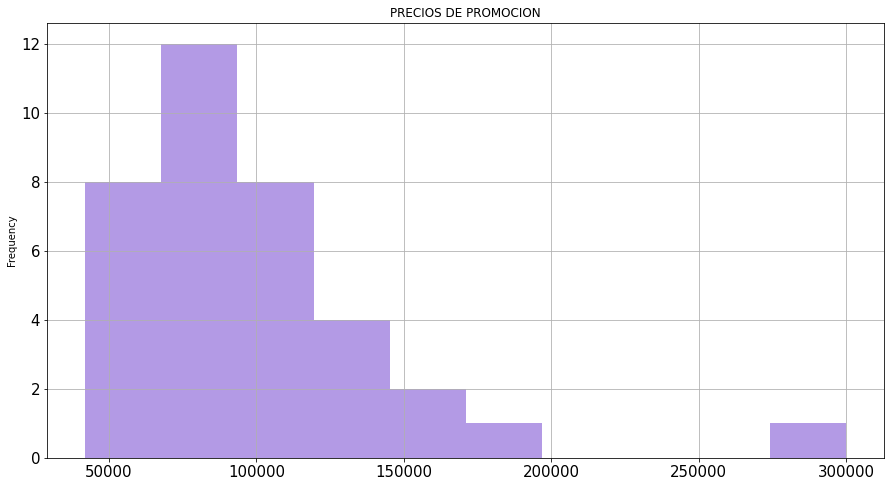

In [152]:
#Grafica de precios promocion  de muebles pergo
df_mueblerias[df_mueblerias.AUTOSERVICIO=="MUEBLES PERGO"]["PRECIO_PROMOCION"].plot(kind ="hist", color = 'mediumpurple',alpha=0.7,
                                                                                   title='PRECIOS DE PROMOCION',grid=True,figsize=(15,8),fontsize=15, )

<AxesSubplot:title={'center':'PRECIOS DE PROMOCION'}, ylabel='Frequency'>

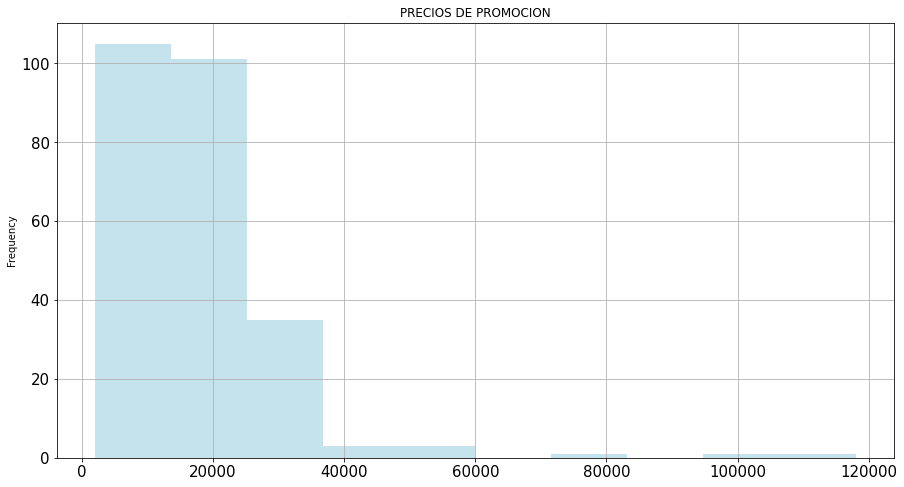

In [153]:
#Grafica de precios promocion  de muebles troncoso
df_mueblerias[df_mueblerias.AUTOSERVICIO=="MUEBLES TRONCOSO"]["PRECIO_PROMOCION"].plot(kind ="hist", color = 'lightblue',alpha=0.7,
                                                                                      title='PRECIOS DE PROMOCION',grid=True,figsize=(15,8),fontsize=15, )

<AxesSubplot:title={'center':'PRECIOS DE PROMOCION'}, ylabel='Frequency'>

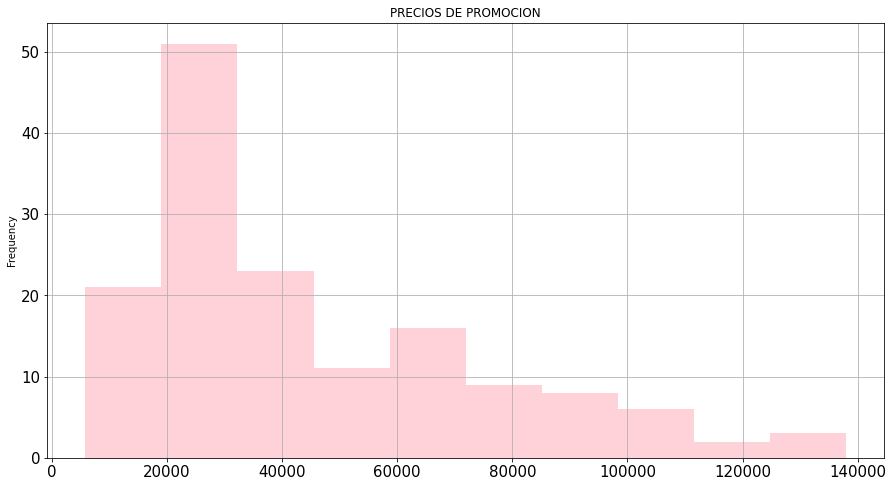

In [154]:
#Grafica de precios promocion  de muebleria casa de las lomas 
df_mueblerias[df_mueblerias.AUTOSERVICIO=="CASA DE LAS LOMAS"]["PRECIO_PROMOCION"].plot(kind ="hist", color = 'pink', alpha=0.7,
                                                                                       title='PRECIOS DE PROMOCION',grid=True,figsize=(15,8),fontsize=15, )

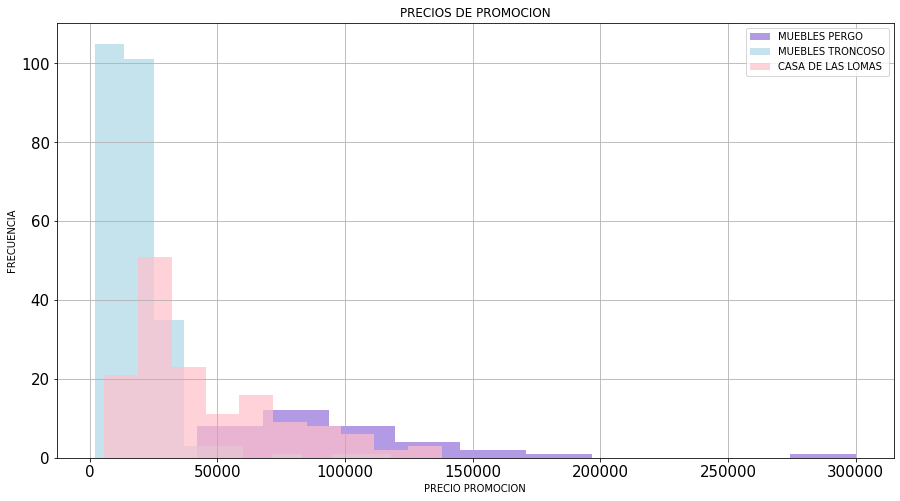

In [ ]:
#para poder compararlas visualmente, las juntamos
df_mueblerias[df_mueblerias.AUTOSERVICIO=="MUEBLES PERGO"]["PRECIO_PROMOCION"].plot(kind ="hist", color = 'mediumpurple',alpha=0.7,
                                                                                   title='PRECIOS DE PROMOCION',grid=True,figsize=(15,8),fontsize=15, )
df_mueblerias[df_mueblerias.AUTOSERVICIO=="MUEBLES TRONCOSO"]["PRECIO_PROMOCION"].plot(kind ="hist", color = 'lightblue',alpha=0.7,
                                                                                      title='PRECIOS DE PROMOCION',grid=True,figsize=(15,8),fontsize=15, )
df_mueblerias[df_mueblerias.AUTOSERVICIO=="CASA DE LAS LOMAS"]["PRECIO_PROMOCION"].plot(kind ="hist", color = 'pink', alpha=0.7,
                                                                                       title='PRECIOS DE PROMOCION',grid=True,figsize=(15,8),fontsize=15, )
plt.xlabel("PRECIO PROMOCION")
plt.ylabel('FRECUENCIA');

plt.legend(['MUEBLES PERGO', 'MUEBLES TRONCOSO', 'CASA DE LAS LOMAS'])


<AxesSubplot:xlabel='PRODUCTO', ylabel='Count'>

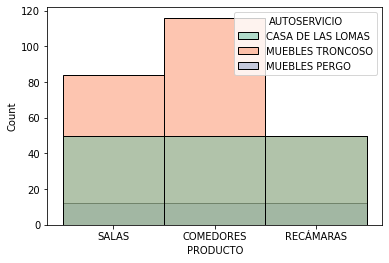

In [161]:
#numero de productos que ofrece cada pagina 
sns.histplot(data=df_mueblerias, x="PRODUCTO", hue="AUTOSERVICIO", palette="Set2", element='bars')

,PRODUCTO,AVG(PRECIO_PROMOCION)
0,RECÁMARAS,24538.475000
1,SALAS,35792.468493
2,COMEDORES,38473.184270


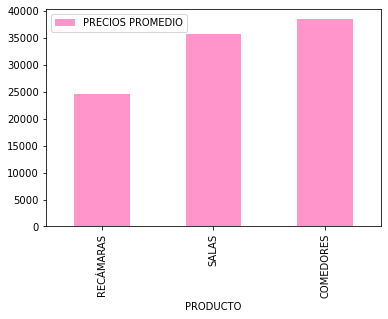

In [164]:
#En esta grafica comparamos los precios promedio de los productos (recamaras, salas y comedores) 
precios_promedios = ps.sqldf("SELECT PRODUCTO,AVG(PRECIO_PROMOCION) FROM df_mueblerias GROUP BY PRODUCTO ORDER BY PRECIO_PROMOCION")
precios_promedios.plot.bar(color="hotpink", x="PRODUCTO", alpha= 0.7)
plt.legend(['PRECIOS PROMEDIO'])
modelos = ps.sqldf("SELECT PRODUCTO,AVG(PRECIO_PROMOCION) FROM df_mueblerias GROUP BY PRODUCTO ORDER BY PRECIO_PROMOCION")
modelos


<AxesSubplot:xlabel='PRODUCTO', ylabel='Count'>

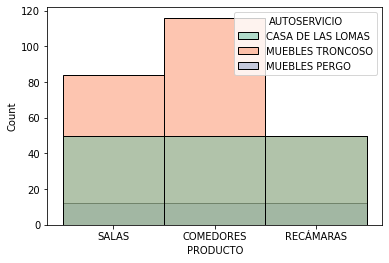

In [133]:
#numero de productos qye ofrece cada pagina 
sns.histplot(data=df_mueblerias, x="PRODUCTO", hue="AUTOSERVICIO", palette="Set2", element='bars')